# PROJECT : Data Product with Machine Learning


### Student Name : Mahjabeen Mohiuddin
### Student_Id: 24610507
### Course : Data Science and Innovation



## Topics of the Project:
### 1. Importing Packages from sklearn
### 2. Data Cleaning Process
### 3. Exploratory Data Analysis 
### 4.  Spliting data into train and validation set and tes set
### 5. Baseline Model Performance
### 6. Models 1:  BaseLine Model

## 7. ### . Model Serving Pipeline Process and building AdaBoost Regressor model



## GitHub Link : https://github.com/rohanbrit/adv_mla_asgn3.git

In [1]:
%load_ext autoreload
%autoreload 2

## 1. Importing Packages from sklearn

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

In [2]:
current_directory = os.getcwd()
parent_directory = Path(current_directory).parent.absolute()
raw_data_path = parent_directory / 'data/raw/itineraries_csv/'

In [3]:
df = pd.DataFrame({})

In [4]:
for directory in os.listdir(raw_data_path):
    directory_path = raw_data_path / directory
    files = Path(directory_path).rglob('*.csv')
    
    df_temp = pd.DataFrame({})
    
    for file in files:
        df_file = pd.read_csv(file)
        df_temp = pd.concat([df_temp, df_file])
        
    df = pd.concat([df, df_temp])
    print(len(df_temp), 'rows of data from', directory, 'directory have been added to the dataframe')

527105 rows of data from OAK directory have been added to the dataframe
0 rows of data from .DS_Store directory have been added to the dataframe
770429 rows of data from DEN directory have been added to the dataframe
1021938 rows of data from LGA directory have been added to the dataframe
1352275 rows of data from LAX directory have been added to the dataframe
874069 rows of data from ATL directory have been added to the dataframe
854536 rows of data from CLT directory have been added to the dataframe
785039 rows of data from PHL directory have been added to the dataframe
747751 rows of data from DTW directory have been added to the dataframe
594215 rows of data from IAD directory have been added to the dataframe
688263 rows of data from JFK directory have been added to the dataframe
896596 rows of data from DFW directory have been added to the dataframe
989175 rows of data from BOS directory have been added to the dataframe
699628 rows of data from EWR directory have been added to the

In [88]:
#data1 = df.copy()

### Loading Data

In [5]:
data1 = pd.read_csv('../data/raw/merged_dataset.csv') 

### Making Copy of original data

In [6]:
df=data1.copy()
df

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,8c3e12759e1b91a21803d1a6178606a8,2022-05-05,2022-06-06,OAK,ATL,PT7H42M,False,False,False,193.99,...,1654577160||1654595760,2022-06-06T22:46:00.000-06:00||2022-06-07T05:5...,DEN||ATL,OAK||DEN,Frontier Airlines||Frontier Airlines,F9||F9,||,9120||10620,943||1207,coach||coach
1,09116e0be6bc1b357c6695e00f48df17,2022-05-05,2022-06-06,OAK,ATL,PT10H25M,False,False,False,255.58,...,1654539000||1654561500,2022-06-06T13:10:00.000-05:00||2022-06-06T20:2...,ORD||ATL,OAK||ORD,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319,15000||7800,None||None,coach||coach
2,27884a7714f975bd4692f0734562a9b1,2022-05-05,2022-06-06,OAK,ATL,PT6H40M,False,False,False,304.78,...,1654547640||1654566000,2022-06-06T13:34:00.000-07:00||2022-06-06T21:4...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,||Airbus A319,5640||14700,None||None,coach||coach
3,46ecaf6738817f2ab949310f9cff6231,2022-05-05,2022-06-06,OAK,ATL,PT8H35M,False,False,False,304.78,...,1654540680||1654566000,2022-06-06T11:38:00.000-07:00||2022-06-06T21:4...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A321 SHARKLETS||Airbus A319,5580||14700,None||None,coach||coach
4,00c9d3aad9478336d57280e4dcfcbd2a,2022-05-05,2022-06-06,OAK,ATL,PT14H5M,False,False,False,304.78,...,1654584360||1654629300,2022-06-06T23:46:00.000-07:00||2022-06-07T15:1...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...,5760||14700,None||None,coach||coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519994,ed1261ce88c4f1ef89b6bee2cffc0d93,2022-04-27,2022-05-10,MIA,DTW,PT9H44M,False,False,False,274.20,...,1652194800||1652219580,2022-05-10T11:00:00.000-04:00||2022-05-10T17:5...,JFK||DTW,MIA||JFK,JetBlue Airways||JetBlue Airways,B6||B6,Airbus A320||Embraer 190,10260||7980,1104||485,coach||coach
13519995,650c4f263b2ecb69b1df5b2976b758de,2022-04-27,2022-05-10,MIA,DTW,PT11H13M,False,False,False,274.20,...,1652189520||1652219580,2022-05-10T09:32:00.000-04:00||2022-05-10T17:5...,JFK||DTW,MIA||JFK,JetBlue Airways||JetBlue Airways,B6||B6,Airbus A320||Embraer 190,10320||7980,1104||485,coach||coach
13519996,71121e298e82dee40e77aa26acd822e6,2022-04-27,2022-05-10,MIA,DTW,PT7H2M,False,False,False,289.61,...,1652204580||1652219580,2022-05-10T13:43:00.000-04:00||2022-05-10T17:5...,JFK||DTW,MIA||JFK,JetBlue Airways||JetBlue Airways,B6||B6,Airbus A320||Embraer 190,10320||7980,1104||485,coach||coach
13519997,0f666eda8ad310c5717a9dca3e8af8b2,2022-04-27,2022-05-10,MIA,DTW,PT3H13M,False,False,True,328.60,...,1652239260,2022-05-10T23:21:00.000-04:00,DTW,MIA,American Airlines,AA,Embraer 175,11580,1153,coach


In [5]:
#df1= df.drop_duplicates(subset=['legId'])
#df1

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,8c3e12759e1b91a21803d1a6178606a8,2022-05-05,2022-06-06,OAK,ATL,PT7H42M,False,False,1.0,193.99,...,1654577160||1654595760,2022-06-06T22:46:00.000-06:00||2022-06-07T05:5...,DEN||ATL,OAK||DEN,Frontier Airlines||Frontier Airlines,F9||F9,||,9120||10620,943||1207,coach||coach
1,09116e0be6bc1b357c6695e00f48df17,2022-05-05,2022-06-06,OAK,ATL,PT10H25M,False,False,1.0,255.58,...,1654539000||1654561500,2022-06-06T13:10:00.000-05:00||2022-06-06T20:2...,ORD||ATL,OAK||ORD,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319,15000||7800,None||None,coach||coach
2,27884a7714f975bd4692f0734562a9b1,2022-05-05,2022-06-06,OAK,ATL,PT6H40M,False,False,1.0,304.78,...,1654547640||1654566000,2022-06-06T13:34:00.000-07:00||2022-06-06T21:4...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,||Airbus A319,5640||14700,None||None,coach||coach
3,46ecaf6738817f2ab949310f9cff6231,2022-05-05,2022-06-06,OAK,ATL,PT8H35M,False,False,1.0,304.78,...,1654540680||1654566000,2022-06-06T11:38:00.000-07:00||2022-06-06T21:4...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A321 SHARKLETS||Airbus A319,5580||14700,None||None,coach||coach
4,00c9d3aad9478336d57280e4dcfcbd2a,2022-05-05,2022-06-06,OAK,ATL,PT14H5M,False,False,1.0,304.78,...,1654584360||1654629300,2022-06-06T23:46:00.000-07:00||2022-06-07T15:1...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...,5760||14700,None||None,coach||coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519696,99b73a9a006e5bec746bbd48b1969c72,2022-04-27,2022-05-09,MIA,SFO,PT14H37M,False,False,1.0,1061.60,...,1652117460||1652148480||1652162220,2022-05-09T13:31:00.000-04:00||2022-05-09T19:0...,CLT||LAX||SFO,MIA||CLT||LAX,American Airlines||American Airlines||American...,AA||AA||AA,Boeing 737-800||Airbus A321||Embraer 175,7860||18780||5520,652||2121||339,coach||coach||coach
13519697,e097a8c75f6af4fca714ea473a28f71b,2022-04-27,2022-05-09,MIA,SFO,PT8H23M,False,False,1.0,1198.60,...,1652136120||1652159400,2022-05-09T18:42:00.000-04:00||2022-05-09T22:1...,ATL||SFO,MIA||ATL,Delta||Delta,DL||DL,Boeing 757||Boeing 757,6900||18660,596||2135,coach||coach
13519698,27b304d53d93a42f4bd71ca1a817e342,2022-04-27,2022-05-09,MIA,SFO,PT11H2M,False,False,1.0,1198.60,...,1652126520||1652159400,2022-05-09T16:02:00.000-04:00||2022-05-09T22:1...,ATL||SFO,MIA||ATL,Delta||Delta,DL||DL,Airbus A321||Boeing 757,6840||18660,596||2135,coach||coach
13519710,7096779027c22fdef2c2032a221cd344,2022-04-27,2022-05-10,MIA,ATL,PT12H46M,True,False,1.0,115.20,...,1652187540||1652222760,2022-05-10T08:59:00.000-04:00||2022-05-10T18:4...,EWR||ATL,MIA||EWR,United||United,UA||UA,Airbus A320||Embraer 175 (Enhanced Winglets),10740||8940,1104||762,coach||coach


### Performing one hot encoding on isNonStop column

In [7]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical column
df['isNonStop'] =encoder.fit_transform(df[['isNonStop']]).toarray()

In [8]:
df

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,8c3e12759e1b91a21803d1a6178606a8,2022-05-05,2022-06-06,OAK,ATL,PT7H42M,False,False,1.0,193.99,...,1654577160||1654595760,2022-06-06T22:46:00.000-06:00||2022-06-07T05:5...,DEN||ATL,OAK||DEN,Frontier Airlines||Frontier Airlines,F9||F9,||,9120||10620,943||1207,coach||coach
1,09116e0be6bc1b357c6695e00f48df17,2022-05-05,2022-06-06,OAK,ATL,PT10H25M,False,False,1.0,255.58,...,1654539000||1654561500,2022-06-06T13:10:00.000-05:00||2022-06-06T20:2...,ORD||ATL,OAK||ORD,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319,15000||7800,None||None,coach||coach
2,27884a7714f975bd4692f0734562a9b1,2022-05-05,2022-06-06,OAK,ATL,PT6H40M,False,False,1.0,304.78,...,1654547640||1654566000,2022-06-06T13:34:00.000-07:00||2022-06-06T21:4...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,||Airbus A319,5640||14700,None||None,coach||coach
3,46ecaf6738817f2ab949310f9cff6231,2022-05-05,2022-06-06,OAK,ATL,PT8H35M,False,False,1.0,304.78,...,1654540680||1654566000,2022-06-06T11:38:00.000-07:00||2022-06-06T21:4...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A321 SHARKLETS||Airbus A319,5580||14700,None||None,coach||coach
4,00c9d3aad9478336d57280e4dcfcbd2a,2022-05-05,2022-06-06,OAK,ATL,PT14H5M,False,False,1.0,304.78,...,1654584360||1654629300,2022-06-06T23:46:00.000-07:00||2022-06-07T15:1...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...,5760||14700,None||None,coach||coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519994,ed1261ce88c4f1ef89b6bee2cffc0d93,2022-04-27,2022-05-10,MIA,DTW,PT9H44M,False,False,1.0,274.20,...,1652194800||1652219580,2022-05-10T11:00:00.000-04:00||2022-05-10T17:5...,JFK||DTW,MIA||JFK,JetBlue Airways||JetBlue Airways,B6||B6,Airbus A320||Embraer 190,10260||7980,1104||485,coach||coach
13519995,650c4f263b2ecb69b1df5b2976b758de,2022-04-27,2022-05-10,MIA,DTW,PT11H13M,False,False,1.0,274.20,...,1652189520||1652219580,2022-05-10T09:32:00.000-04:00||2022-05-10T17:5...,JFK||DTW,MIA||JFK,JetBlue Airways||JetBlue Airways,B6||B6,Airbus A320||Embraer 190,10320||7980,1104||485,coach||coach
13519996,71121e298e82dee40e77aa26acd822e6,2022-04-27,2022-05-10,MIA,DTW,PT7H2M,False,False,1.0,289.61,...,1652204580||1652219580,2022-05-10T13:43:00.000-04:00||2022-05-10T17:5...,JFK||DTW,MIA||JFK,JetBlue Airways||JetBlue Airways,B6||B6,Airbus A320||Embraer 190,10320||7980,1104||485,coach||coach
13519997,0f666eda8ad310c5717a9dca3e8af8b2,2022-04-27,2022-05-10,MIA,DTW,PT3H13M,False,False,0.0,328.60,...,1652239260,2022-05-10T23:21:00.000-04:00,DTW,MIA,American Airlines,AA,Embraer 175,11580,1153,coach


## 2. Data Cleaning Process

### Analysing the column list

In [9]:
df.columns

Index(['legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'travelDuration', 'isBasicEconomy',
       'isRefundable', 'isNonStop', 'totalFare', 'totalTravelDistance',
       'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw',
       'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       'segmentsAirlineName', 'segmentsAirlineCode',
       'segmentsEquipmentDescription', 'segmentsDurationInSeconds',
       'segmentsDistance', 'segmentsCabinCode'],
      dtype='object')

### Analysing the features data types 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13519999 entries, 0 to 13519998
Data columns (total 23 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   legId                              object 
 1   searchDate                         object 
 2   flightDate                         object 
 3   startingAirport                    object 
 4   destinationAirport                 object 
 5   travelDuration                     object 
 6   isBasicEconomy                     bool   
 7   isRefundable                       bool   
 8   isNonStop                          float64
 9   totalFare                          float64
 10  totalTravelDistance                float64
 11  segmentsDepartureTimeEpochSeconds  object 
 12  segmentsDepartureTimeRaw           object 
 13  segmentsArrivalTimeEpochSeconds    object 
 14  segmentsArrivalTimeRaw             object 
 15  segmentsArrivalAirportCode         object 
 16  segmentsDepartur

### Analysing the summary statistics of dataframe

In [11]:
df.describe()

,isNonStop,totalFare,totalTravelDistance
count,1.352000e+07,1.352000e+07,1.256038e+07
mean,7.074012e-01,3.737535e+02,1.569619e+03
std,4.549558e-01,2.075496e+02,8.414888e+02
min,0.000000e+00,2.397000e+01,9.700000e+01
25%,0.000000e+00,2.235800e+02,8.620000e+02
50%,1.000000e+00,3.446000e+02,1.392000e+03
75%,1.000000e+00,4.876000e+02,2.376000e+03
max,1.000000e+00,8.260610e+03,4.430000e+03


### Assessing the number of  nan values and its columns

In [12]:
df.isna().sum().sum()

1349280

In [13]:
df.isna().sum()

legId                                     0
searchDate                                0
flightDate                                0
startingAirport                           0
destinationAirport                        0
travelDuration                            0
isBasicEconomy                            0
isRefundable                              0
isNonStop                                 0
totalFare                                 0
totalTravelDistance                  959619
segmentsDepartureTimeEpochSeconds         0
segmentsDepartureTimeRaw                  0
segmentsArrivalTimeEpochSeconds           0
segmentsArrivalTimeRaw                    0
segmentsArrivalAirportCode                0
segmentsDepartureAirportCode              0
segmentsAirlineName                       0
segmentsAirlineCode                       0
segmentsEquipmentDescription         262676
segmentsDurationInSeconds                 0
segmentsDistance                     126985
segmentsCabinCode               

### Assing the duplicate values

In [14]:
total_duplicates = df.duplicated().sum()
print("Total duplicated rows in dataframe:", total_duplicates)

Total duplicated rows in dataframe: 0


### Selecting only required columns

In [15]:
df2= df[['legId','flightDate','startingAirport', 'destinationAirport','totalFare', 'segmentsDepartureTimeRaw','segmentsCabinCode','isNonStop','segmentsAirlineCode']]

In [16]:
#converting flighDate into datetime datatype:
df2['flightDate'] = pd.to_datetime(df2['flightDate'])

#Extracting and creating new features out of the date variable
df2['flightYear'] = df2['flightDate'].dt.year
df2['flightMonth'] = df2['flightDate'].dt.month
df2['flightDay'] = df2['flightDate'].dt.day

/var/folders/9c/b8x7cjsj3ns9391k_v_4_3dr0000gn/T/ipykernel_26480/1883846066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['flightDate'] = pd.to_datetime(df2['flightDate'])
/var/folders/9c/b8x7cjsj3ns9391k_v_4_3dr0000gn/T/ipykernel_26480/1883846066.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['flightYear'] = df2['flightDate'].dt.year
/var/folders/9c/b8x7cjsj3ns9391k_v_4_3dr0000gn/T/ipykernel_26480/1883846066.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

### Splitting the segment raw time

In [17]:
# Function to extract the first time from the time_values column
def departuretime(hour_min):
    dep_time = hour_min.split("||")
    if dep_time :
        return dep_time [0].split("T")[1]
    return ""


In [18]:
df2['Departure_Time'] = df2['segmentsDepartureTimeRaw'].apply(departuretime)

/var/folders/9c/b8x7cjsj3ns9391k_v_4_3dr0000gn/T/ipykernel_26480/3164253048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Departure_Time'] = df2['segmentsDepartureTimeRaw'].apply(departuretime)


### Splitting hours from 'Departure_Time

In [19]:
def departure_hours(Departure_hours):
    parts = Departure_hours.split(':')
    if len(parts) >= 2:
        return int(parts[0])
    return None

In [20]:
df2['departureHour'] = df2['Departure_Time'].apply(departure_hours)

/var/folders/9c/b8x7cjsj3ns9391k_v_4_3dr0000gn/T/ipykernel_26480/3146845421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['departureHour'] = df2['Departure_Time'].apply(departure_hours)


In [21]:
df2['departureHour']

0           19
1            7
2           12
3           10
4           22
            ..
13519994     8
13519995     6
13519996    10
13519997    20
13519998     6
Name: departureHour, Length: 13519999, dtype: int64

In [22]:
df2

,legId,flightDate,startingAirport,destinationAirport,totalFare,segmentsDepartureTimeRaw,segmentsCabinCode,isNonStop,segmentsAirlineCode,flightYear,flightMonth,flightDay,Departure_Time,departureHour
0,8c3e12759e1b91a21803d1a6178606a8,2022-06-06,OAK,ATL,193.99,2022-06-06T19:14:00.000-07:00||2022-06-07T00:5...,coach||coach,1.0,F9||F9,2022,6,6,19:14:00.000-07:00,19
1,09116e0be6bc1b357c6695e00f48df17,2022-06-06,OAK,ATL,255.58,2022-06-06T07:00:00.000-07:00||2022-06-06T17:1...,coach||coach,1.0,NK||NK,2022,6,6,07:00:00.000-07:00,7
2,27884a7714f975bd4692f0734562a9b1,2022-06-06,OAK,ATL,304.78,2022-06-06T12:00:00.000-07:00||2022-06-06T14:3...,coach||coach,1.0,NK||NK,2022,6,6,12:00:00.000-07:00,12
3,46ecaf6738817f2ab949310f9cff6231,2022-06-06,OAK,ATL,304.78,2022-06-06T10:05:00.000-07:00||2022-06-06T14:3...,coach||coach,1.0,NK||NK,2022,6,6,10:05:00.000-07:00,10
4,00c9d3aad9478336d57280e4dcfcbd2a,2022-06-06,OAK,ATL,304.78,2022-06-06T22:10:00.000-07:00||2022-06-07T08:1...,coach||coach,1.0,NK||NK,2022,6,6,22:10:00.000-07:00,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519994,ed1261ce88c4f1ef89b6bee2cffc0d93,2022-05-10,MIA,DTW,274.20,2022-05-10T08:09:00.000-04:00||2022-05-10T15:4...,coach||coach,1.0,B6||B6,2022,5,10,08:09:00.000-04:00,8
13519995,650c4f263b2ecb69b1df5b2976b758de,2022-05-10,MIA,DTW,274.20,2022-05-10T06:40:00.000-04:00||2022-05-10T15:4...,coach||coach,1.0,B6||B6,2022,5,10,06:40:00.000-04:00,6
13519996,71121e298e82dee40e77aa26acd822e6,2022-05-10,MIA,DTW,289.61,2022-05-10T10:51:00.000-04:00||2022-05-10T15:4...,coach||coach,1.0,B6||B6,2022,5,10,10:51:00.000-04:00,10
13519997,0f666eda8ad310c5717a9dca3e8af8b2,2022-05-10,MIA,DTW,328.60,2022-05-10T20:08:00.000-04:00,coach,0.0,AA,2022,5,10,20:08:00.000-04:00,20


### Splitting minutes from 'Departure_Time

In [23]:
def departure_minutes(Departure_minute):
    parts = Departure_minute.split(':')
    if len(parts) >= 3:
        dep_min = parts[1].split('.')[0] 
        return int(dep_min)
    return None

In [24]:

df2['departureMinutes'] = df2['Departure_Time'].apply(departure_minutes)

/var/folders/9c/b8x7cjsj3ns9391k_v_4_3dr0000gn/T/ipykernel_26480/2883699022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['departureMinutes'] = df2['Departure_Time'].apply(departure_minutes)


In [25]:
df2['departureMinutes']

0           14
1            0
2            0
3            5
4           10
            ..
13519994     9
13519995    40
13519996    51
13519997     8
13519998     0
Name: departureMinutes, Length: 13519999, dtype: int64

### Analysing the isNonStop valu counts

In [26]:
df2.isNonStop.value_counts()

isNonStop
1.0    9564064
0.0    3955935
Name: count, dtype: int64

In [27]:
df2.columns

Index(['legId', 'flightDate', 'startingAirport', 'destinationAirport',
       'totalFare', 'segmentsDepartureTimeRaw', 'segmentsCabinCode',
       'isNonStop', 'segmentsAirlineCode', 'flightYear', 'flightMonth',
       'flightDay', 'Departure_Time', 'departureHour', 'departureMinutes'],
      dtype='object')

In [28]:
df2.isna().sum()

legId                       0
flightDate                  0
startingAirport             0
destinationAirport          0
totalFare                   0
segmentsDepartureTimeRaw    0
segmentsCabinCode           0
isNonStop                   0
segmentsAirlineCode         0
flightYear                  0
flightMonth                 0
flightDay                   0
Departure_Time              0
departureHour               0
departureMinutes            0
dtype: int64

## Saving cleaned data into the csv

In [30]:
df2.to_csv('../data/raw/cleaned_Dataset3.9.csv',index=False)

### Loading Cleaned Dataset

In [2]:
df3= pd.read_csv('../data/raw/cleaned_Dataset3.9.csv')

In [3]:
df3

,legId,flightDate,startingAirport,destinationAirport,totalFare,segmentsDepartureTimeRaw,segmentsCabinCode,isNonStop,segmentsAirlineCode,flightYear,flightMonth,flightDay,Departure_Time,departureHour,departureMinutes
0,8c3e12759e1b91a21803d1a6178606a8,2022-06-06,OAK,ATL,193.99,2022-06-06T19:14:00.000-07:00||2022-06-07T00:5...,coach||coach,1.0,F9||F9,2022,6,6,19:14:00.000-07:00,19,14
1,09116e0be6bc1b357c6695e00f48df17,2022-06-06,OAK,ATL,255.58,2022-06-06T07:00:00.000-07:00||2022-06-06T17:1...,coach||coach,1.0,NK||NK,2022,6,6,07:00:00.000-07:00,7,0
2,27884a7714f975bd4692f0734562a9b1,2022-06-06,OAK,ATL,304.78,2022-06-06T12:00:00.000-07:00||2022-06-06T14:3...,coach||coach,1.0,NK||NK,2022,6,6,12:00:00.000-07:00,12,0
3,46ecaf6738817f2ab949310f9cff6231,2022-06-06,OAK,ATL,304.78,2022-06-06T10:05:00.000-07:00||2022-06-06T14:3...,coach||coach,1.0,NK||NK,2022,6,6,10:05:00.000-07:00,10,5
4,00c9d3aad9478336d57280e4dcfcbd2a,2022-06-06,OAK,ATL,304.78,2022-06-06T22:10:00.000-07:00||2022-06-07T08:1...,coach||coach,1.0,NK||NK,2022,6,6,22:10:00.000-07:00,22,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519994,ed1261ce88c4f1ef89b6bee2cffc0d93,2022-05-10,MIA,DTW,274.20,2022-05-10T08:09:00.000-04:00||2022-05-10T15:4...,coach||coach,1.0,B6||B6,2022,5,10,08:09:00.000-04:00,8,9
13519995,650c4f263b2ecb69b1df5b2976b758de,2022-05-10,MIA,DTW,274.20,2022-05-10T06:40:00.000-04:00||2022-05-10T15:4...,coach||coach,1.0,B6||B6,2022,5,10,06:40:00.000-04:00,6,40
13519996,71121e298e82dee40e77aa26acd822e6,2022-05-10,MIA,DTW,289.61,2022-05-10T10:51:00.000-04:00||2022-05-10T15:4...,coach||coach,1.0,B6||B6,2022,5,10,10:51:00.000-04:00,10,51
13519997,0f666eda8ad310c5717a9dca3e8af8b2,2022-05-10,MIA,DTW,328.60,2022-05-10T20:08:00.000-04:00,coach,0.0,AA,2022,5,10,20:08:00.000-04:00,20,8


In [4]:
df3['segmentsCabinCode'] = df3['segmentsCabinCode'].str.split('\|\|').str[0]

In [5]:
df3=df3.drop(['legId','flightDate','segmentsDepartureTimeRaw','Departure_Time','segmentsAirlineCode'], axis=1)

In [6]:
df3

,startingAirport,destinationAirport,totalFare,segmentsCabinCode,isNonStop,flightYear,flightMonth,flightDay,departureHour,departureMinutes
0,OAK,ATL,193.99,coach,1.0,2022,6,6,19,14
1,OAK,ATL,255.58,coach,1.0,2022,6,6,7,0
2,OAK,ATL,304.78,coach,1.0,2022,6,6,12,0
3,OAK,ATL,304.78,coach,1.0,2022,6,6,10,5
4,OAK,ATL,304.78,coach,1.0,2022,6,6,22,10
...,...,...,...,...,...,...,...,...,...,...
13519994,MIA,DTW,274.20,coach,1.0,2022,5,10,8,9
13519995,MIA,DTW,274.20,coach,1.0,2022,5,10,6,40
13519996,MIA,DTW,289.61,coach,1.0,2022,5,10,10,51
13519997,MIA,DTW,328.60,coach,0.0,2022,5,10,20,8


### Performing groupby function on columns and computing mean function on totalFare

In [7]:
df4= df3.groupby(['startingAirport', 'destinationAirport', 'segmentsCabinCode','isNonStop','flightYear','flightMonth','flightDay','departureHour','departureMinutes'])['totalFare'].mean().reset_index()


In [8]:
df4

,startingAirport,destinationAirport,segmentsCabinCode,isNonStop,flightYear,flightMonth,flightDay,departureHour,departureMinutes,totalFare
0,ATL,BOS,coach,0.0,2022,4,17,6,30,248.60
1,ATL,BOS,coach,0.0,2022,4,17,9,59,248.60
2,ATL,BOS,coach,0.0,2022,4,17,10,45,274.35
3,ATL,BOS,coach,0.0,2022,4,17,11,35,248.60
4,ATL,BOS,coach,0.0,2022,4,17,12,57,248.60
...,...,...,...,...,...,...,...,...,...,...
970742,SFO,PHL,premium coach,1.0,2022,6,18,12,55,844.60
970743,SFO,PHL,premium coach,1.0,2022,6,23,12,55,1014.59
970744,SFO,PHL,premium coach,1.0,2022,7,1,22,35,638.10
970745,SFO,PHL,premium coach,1.0,2022,7,7,12,55,844.60


## 3. Exploratory Data Analysis 

#### Visualization on Number of Flights on Origin Airport

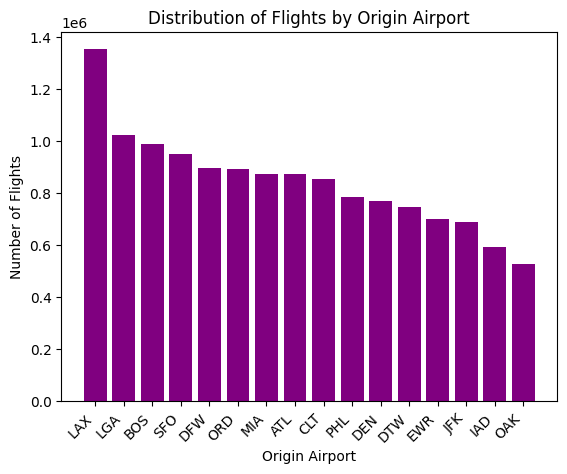

In [9]:
import matplotlib.pyplot as plt

origin_counts = df3['startingAirport'].value_counts()

# Create a bar plot with a specific color
plt.bar(origin_counts.index, origin_counts.values, color='purple')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')  # ha='right' ensures that labels are right-aligned for better visibility

plt.xlabel('Origin Airport')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flights by Origin Airport')

plt.show()


#### Visualization on Number of Flights on Destination Airport

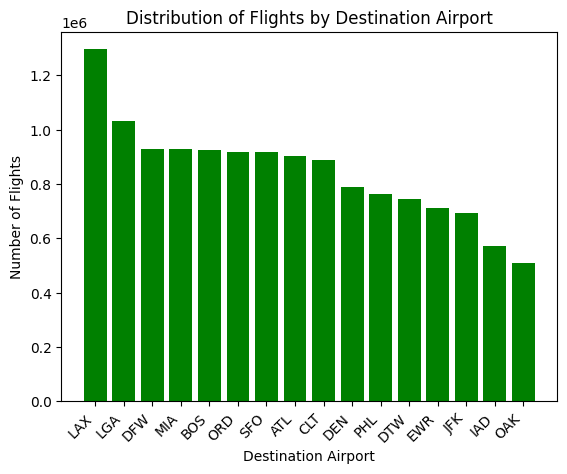

In [10]:
destination_counts = df3['destinationAirport'].value_counts()

# Create a bar plot with a specific color
plt.bar(destination_counts.index, destination_counts.values, color='green')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')  # ha='right' ensures that labels are right-aligned for better visibility

plt.xlabel('Destination Airport')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flights by Destination Airport')

plt.show()


#### Visualization on Number of layovers

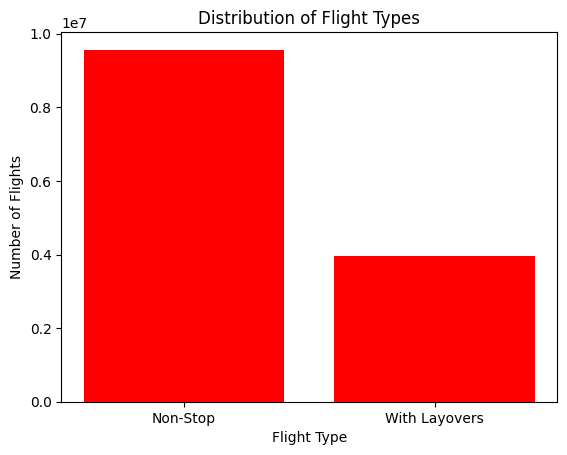

In [11]:
# Assuming your DataFrame is named df3
layover_counts = df3['isNonStop'].value_counts()

# Creating a bar plot with explicit x-axis labels
plt.bar([0, 1], layover_counts.values, color='red', tick_label=['Non-Stop', 'With Layovers'])

plt.xlabel('Flight Type')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flight Types')

plt.show()


### Visualization of effect of fare based on layover

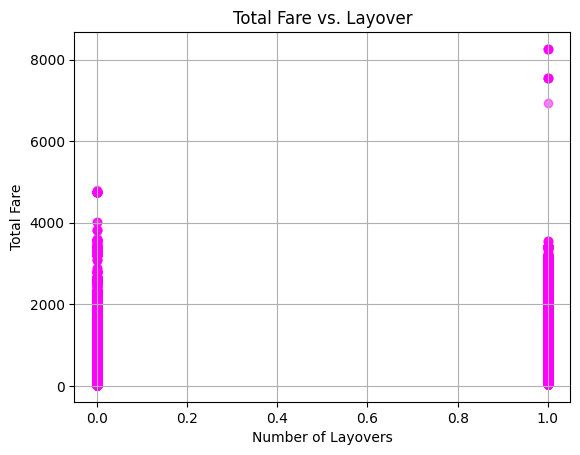

In [12]:
plt.scatter(df3['isNonStop'], df3['totalFare'], alpha=0.5, color='magenta')
plt.title('Total Fare vs. Layover')
plt.xlabel('Number of Layovers')
plt.ylabel('Total Fare')
plt.grid(True)
plt.show()

### Analysing whether non-stop flight or flights with overlay has the high fare price

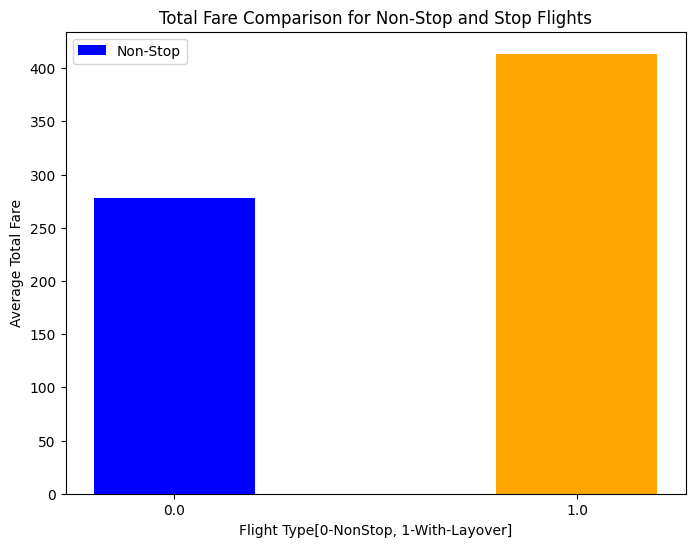

In [13]:
grouped_df = df3.groupby('isNonStop')['totalFare'].mean().reset_index()

# Plotting the comparison using a bar chart
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.4

bars = ax.bar(grouped_df['isNonStop'].astype(str), grouped_df['totalFare'], width=bar_width, color=['blue', 'orange'])

ax.set_xlabel('Flight Type[0-NonStop, 1-With-Layover]')
ax.set_ylabel('Average Total Fare')
ax.set_title('Total Fare Comparison for Non-Stop and Stop Flights')
ax.legend(['Non-Stop', 'Stop'])

plt.show()

### Splitting features and target set

In [44]:
X = df3.drop('totalFare', axis=1)  # X is feature columns
y = df3['totalFare']  # y is target variable


In [45]:
X 

,startingAirport,destinationAirport,segmentsCabinCode,isNonStop,flightYear,flightMonth,flightDay,departureHour,departureMinutes
0,OAK,ATL,coach,1.0,2022,6,6,19,14
1,OAK,ATL,coach,1.0,2022,6,6,7,0
2,OAK,ATL,coach,1.0,2022,6,6,12,0
3,OAK,ATL,coach,1.0,2022,6,6,10,5
4,OAK,ATL,coach,1.0,2022,6,6,22,10
...,...,...,...,...,...,...,...,...,...
13519994,MIA,DTW,coach,1.0,2022,5,10,8,9
13519995,MIA,DTW,coach,1.0,2022,5,10,6,40
13519996,MIA,DTW,coach,1.0,2022,5,10,10,51
13519997,MIA,DTW,coach,0.0,2022,5,10,20,8


## 4.  Spliting data into train and validation set and tes set

In [46]:
from sklearn.model_selection import train_test_split

X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [47]:
print(X_train.shape)


(8652799, 9)


## 5. Baseline Model Performance

In [48]:
pred_value = y_train.mean()
y_base = np.full(len(y_train), pred_value)


In [49]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
print("The mse score of baseline model is:",mse(y_base, y_train, squared=False))
print("The mae score of baseline model is:",mae(y_base, y_train))

The mse score of baseline model is: 207.50067742959385
The mae score of baseline model is: 154.9499634533744


## 6. Model Serving (Pipeline Process) and building Random Forest Regressor model

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,TargetEncoder,FunctionTransformer
from joblib import dump, load
from sklearn.ensemble import AdaBoostRegressor


In [51]:
num_cols = ['isNonStop','flightYear', 'flightMonth', 'flightDay', 'departureHour', 'departureMinutes']

In [52]:
num_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

### Assigining categorical columns

In [53]:
startingAirport ='startingAirport'
destinationAirport='destinationAirport'
segmentsCabinCode ='segmentsCabinCode'


### Initiating pipeline for Origin_Airport categorical column and encoding using TargetEncoder

In [54]:
#transforming categorical columns using cat_transformer
startingAirport_transformer = Pipeline(
    steps=[
        ('target_encoder',TargetEncoder(random_state=8))
    ]
)

### Initiating pipeline for Destination_Airport categorical column and encoding using TargetEncoder

In [55]:
destinationAirport_transformer = Pipeline(
    steps=[
        ('target_encoder', TargetEncoder(random_state=8))
    ]
)

### Initiating pipeline for SegmentCabinCode categorical column and encoding using TargetEncoder

In [56]:
segmentsCabinCode_transformer = Pipeline(
    steps=[
        ('target_encoder', TargetEncoder(random_state=8))
    ]
)

### Ingesting numerical columns and categorical columns into the Column Transformer

In [57]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_cols', num_transformer, num_cols),
        ('startingAirport',startingAirport_transformer,[startingAirport]),
        ('segmentsCabinCode',segmentsCabinCode_transformer,[segmentsCabinCode]),
      ],
    remainder='drop'
)

In [58]:
dump(preprocessor, '../models/layover_preprocessor_pipe3.9.joblib')

['../models/layover_preprocessor_pipe3.9.joblib']

### Creating a Pipeline for preprocessor and for AdaBoostRegressor   

In [59]:
adab_pipe= Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        
        ('adab',AdaBoostRegressor(n_estimators=50, learning_rate=1.0, loss='linear',base_estimator='deprecated',random_state=42))
         
    ]
)    

### Fitting the Model into the pipeline

In [60]:
#fitting the pipeline
adab_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['isNonStop', 'flightYear',
                                                   'flightMonth', 'flightDay',
                                                   'departureHour',
                                                   'departureMinutes']),
                                                 ('startingAirport',
                                                  Pipeline(steps=[('target_encoder',
                                                                   TargetEncoder(random_state=8))]),
                                                  ['startingAirport']),
                                                 ('segmentsCabinCode',
                                                  Pipeline(steps=[('target_encoder',
                                                                   TargetEncoder(random_state=8))]),
                                                  ['segmentsCabinCode'])])),
                ('adab', AdaBoostRegressor(random_state=42))])

### Prediction on the train set

In [61]:
#predicting y_train
y_train_preds = adab_pipe.predict(X_train)

### Printing metrics mse and mae scores for train set

In [62]:
print('The mean squared error for train set is:' , mse(y_train, y_train_preds, squared=False))
print('The mean absolute error for train set is: ' ,mae(y_train, y_train_preds))

The mean squared error for train set is: 183.40314808886214
The mean absolute error for train set is:  137.34291709321658


### Prediction on the validation set

In [63]:

y_val_preds = adab_pipe.predict(X_val)

### Printing metrics mse and mae scores for validation set

In [64]:

print('The mean squared error of validation set is : ',mse(y_val, y_val_preds, squared=False))
print('The mean absoulte error of validation set is: ',mae(y_val, y_val_preds)) 

The mean squared error of validation set is :  183.53889261144298
The mean absoulte error of validation set is:  137.32068331846247


### Evaluating the test set and Printing metrics mse and mae scores for test set

In [65]:
y_test_preds = adab_pipe.predict(X_test)
print('The mean squared error of test set is :', mse(y_test, y_test_preds, squared=False))
print('The mean absoulte error of test set is: ',mae(y_test, y_test_preds))  

The mean squared error of test set is : 183.65170672194114
The mean absoulte error of test set is:  137.37440768679198


### Saving model into the joblib

In [66]:
#saving the model:
from joblib import dump
dump(adab_pipe, '../models/layover_model3.9.joblib')

['../models/layover_model3.9.joblib']

### Stremlit layover model code

In [ ]:
def layover_predict(df):
    display_cols = ['isNonStop', 'predictedFare']
    df['isNonStop'] = 0
    df = pd.concat([df, df.assign(isNonStop=1)], ignore_index=True)
    df['predictedFare'] = layover_model.predict(df).round(2)
    return df[display_cols]